## Banco de dados

O Python possui um suporte nativo para o banco de dados **sqlite** por meio da biblioteca **sqlite3**.

Para utilizar este notebook será necessário o banco de dados **fakePrices.db**.
Para criar o banco de *fakePrices.db* execute o script em Python **mddb.py**  no diretório **scipt**. Você pode fazer isso executando o arquivo dentro do spyder o por linha de comando no cmd do *Windows*.

No cmd do Windows(o prompt do cmd precisa estar dentro do diretório *script*):

<code>python mddb.py</code>



Para entender como funciona a linguagem SQL:
<a href='https://www.sqlite.org/lang_select.html'> https://www.sqlite.org/lang_select.html</a>

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Executando uma query no banco de dados sem o pacote pandas
db = 'Dados/fakePrices.db'
tabela = 'ABCB4'


con = sqlite3.connect(db)

c = con.cursor()

query = 'SELECT * FROM {}'.format(tabela)

c.execute(query)
resultado_query = c.fetchall()
resultado_query[:5]

[('2019-08-27 14:34:46', 19.7, '14:34:46'),
 ('2019-08-27 14:35:46', 18.14, '14:35:46'),
 ('2019-08-27 14:36:46', 19.84, '14:36:46'),
 ('2019-08-27 14:37:46', 16.53, '14:37:46'),
 ('2019-08-27 14:38:46', 17.63, '14:38:46')]

#### Lendo os banco de dados utilizando o Pandas


Notar que o pandas não precisa de *cursor*.

In [3]:
db = 'Dados/fakePrices.db'
tabela = 'ABCB4'
query = 'SELECT * FROM {}'.format(tabela)

con = sqlite3.connect(db)
dfa = pd.read_sql(query, con)
dfa.head()

,date,ultimo,hora
0,2019-08-27 14:34:46,19.70,14:34:46
1,2019-08-27 14:35:46,18.14,14:35:46
2,2019-08-27 14:36:46,19.84,14:36:46
3,2019-08-27 14:37:46,16.53,14:37:46
4,2019-08-27 14:38:46,17.63,14:38:46


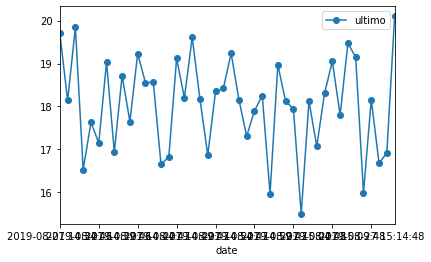

In [4]:
dfa.plot(x='date', y='ultimo', style='o-')

Uma consulta mais elaborada

In [5]:
db = 'Dados/fakePrices.db'
tabela = 'ABCB4'
query = 'SELECT * FROM {}'.format(tabela)

con = sqlite3.connect(db)
dfa = pd.read_sql(query, con, parse_dates=True)
dfa.head()

,date,ultimo,hora
0,2019-08-27 14:34:46,19.70,14:34:46
1,2019-08-27 14:35:46,18.14,14:35:46
2,2019-08-27 14:36:46,19.84,14:36:46
3,2019-08-27 14:37:46,16.53,14:37:46
4,2019-08-27 14:38:46,17.63,14:38:46


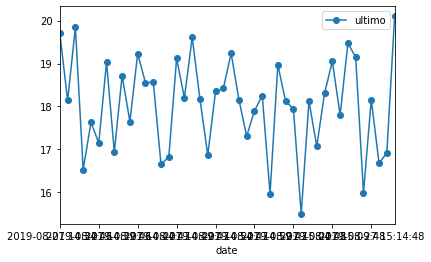

In [6]:
dfa.plot(x='date', y='ultimo', style='o-')

In [7]:
db = 'Dados/fakePrices.db'
tabela = 'ABCB4'
query = 'SELECT * FROM {}'.format(tabela)

con = sqlite3.connect(db)
dfa = pd.read_sql(query, con, parse_dates=['date'], index_col='date')
dfa.head()

,ultimo,hora
date,,
2019-08-27 14:34:46,19.70,14:34:46
2019-08-27 14:35:46,18.14,14:35:46
2019-08-27 14:36:46,19.84,14:36:46
2019-08-27 14:37:46,16.53,14:37:46
2019-08-27 14:38:46,17.63,14:38:46


In [8]:
dfa['2019-08-27 14:00'<= dfa.index].head()

,ultimo,hora
date,,
2019-08-27 14:34:46,19.70,14:34:46
2019-08-27 14:35:46,18.14,14:35:46
2019-08-27 14:36:46,19.84,14:36:46
2019-08-27 14:37:46,16.53,14:37:46
2019-08-27 14:38:46,17.63,14:38:46


In [9]:
dfa[dfa.ultimo>=19]

,ultimo,hora
date,,
2019-08-27 14:34:46,19.70,14:34:46
2019-08-27 14:36:46,19.84,14:36:46
2019-08-27 14:40:46,19.03,14:40:46
2019-08-27 14:44:47,19.23,14:44:47
2019-08-27 14:49:47,19.12,14:49:47
2019-08-27 14:51:47,19.61,14:51:47
2019-08-27 14:56:47,19.24,14:56:47
2019-08-27 15:09:48,19.05,15:09:48
2019-08-27 15:11:48,19.47,15:11:48


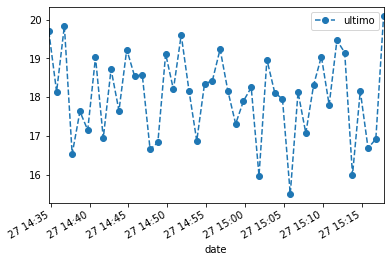

In [10]:
dfa.plot(y='ultimo', style='o--')

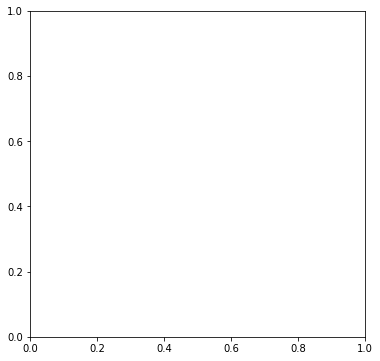

In [11]:
f, ax = plt.subplots(1, 1, figsize=(6, 6))
# dfa.rolling('5min').median().plot(style ='y-o', ax=ax)
# dfa.rolling('5min').max().plot(style ='r^-', ax=ax)
# dfa.rolling('5min').min().plot(style ='b--o', ax=ax)



In [12]:
dfa.describe()

,ultimo
count,44.000000
mean,18.047727
std,1.113264
min,15.500000
25%,17.130000
50%,18.160000
75%,18.985000
max,20.100000


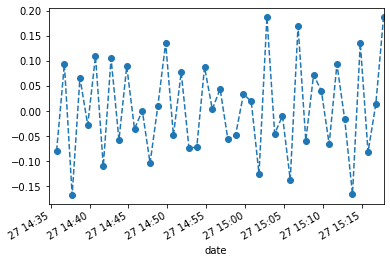

In [13]:
dfa['ultimo'].pct_change().plot(style='o--')

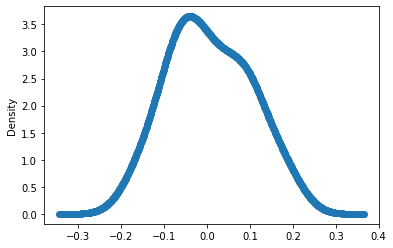

In [14]:
dfa['ultimo'].pct_change().plot(kind='kde', style='o--')

Vamos adicionar mais tabelas a este dataframe?

In [15]:
db = 'Dados/fakePrices.db'
tabela = 'ABEV3'
query = 'SELECT * FROM {}'.format(tabela)

con = sqlite3.connect(db)
dfb = pd.read_sql(query, con, parse_dates=['date'], index_col='date')
dfb.head()

,ultimo,hora
date,,
2019-08-27 14:34:46,19.61,14:34:46
2019-08-27 14:35:46,18.02,14:35:46
2019-08-27 14:36:46,18.04,14:36:46
2019-08-27 14:37:46,19.65,14:37:46
2019-08-27 14:38:46,19.53,14:38:46


In [16]:
df = pd.concat((dfa, dfb), axis=1)['ultimo']
df.columns = ['ABCB4', 'ABEV3']
df.head()

,ABCB4,ABEV3
date,,
2019-08-27 14:34:46,19.70,19.61
2019-08-27 14:35:46,18.14,18.02
2019-08-27 14:36:46,19.84,18.04
2019-08-27 14:37:46,16.53,19.65
2019-08-27 14:38:46,17.63,19.53


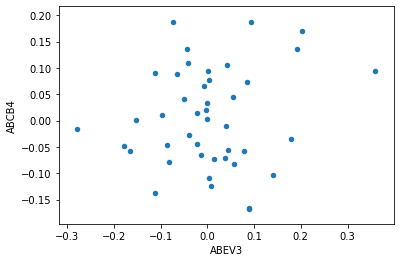

In [17]:
df.pct_change().plot(x='ABEV3', y='ABCB4', kind='scatter')

#### Aproveitando a oportunidade para apresentar mais um pacote para análises estatísticas...

In [18]:
import statsmodels.api as sm
import statsmodels.formula.api as smf




In [19]:
reg = smf.ols('ABCB4 ~ ABEV3', df).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  ABCB4   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                    0.2934
Date:                Thu, 17 Oct 2019   Prob (F-statistic):              0.591
Time:                        07:26:32   Log-Likelihood:                -66.495
No. Observations:                  44   AIC:                             137.0
Df Residuals:                      42   BIC:                             140.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.7767      2.353      7.131      0.0